<a href="https://colab.research.google.com/github/SenthilBalajiPrakash/EDA/blob/master/Churn_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [ ]:
# Reading the data

telco_base_data = pd.read_csv('Customer-Churn.csv')

In [ ]:
telco_base_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
telco_base_data.Churn.value_counts()/len(telco_base_data)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [ ]:
telco_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Converting Total charges column to numeric

In [ ]:
telco_base_data.TotalCharges = pd.to_numeric(telco_base_data.TotalCharges, errors='coerce')

In [ ]:
telco_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
telco_base_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Finding the percentage of missing values in each column

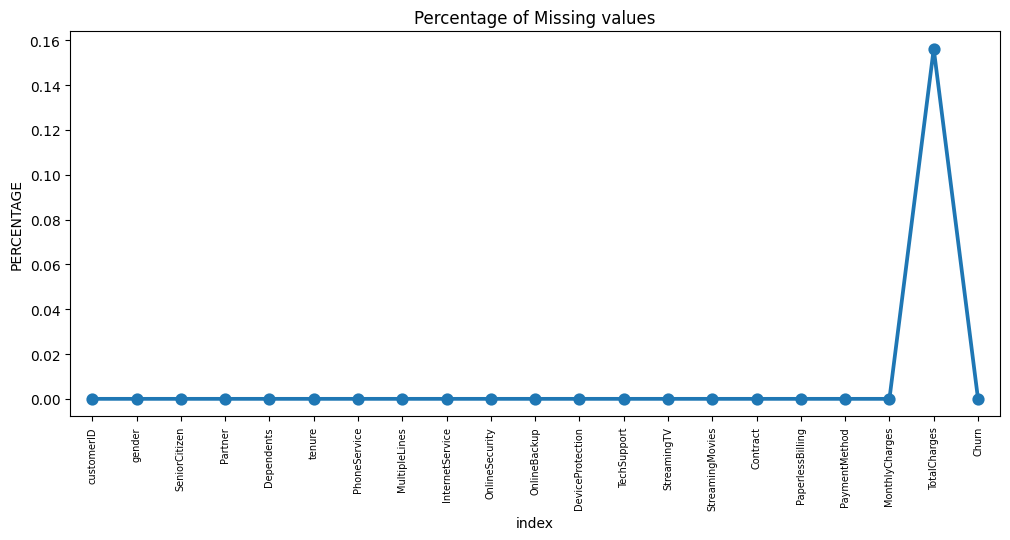

In [ ]:
missing = pd.DataFrame((telco_base_data.isnull().sum())*100/telco_base_data.shape[0]).reset_index()
plt.figure(figsize=(12,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

## Data Cleaning

### Missing Value Treatment

- Since the % of these records compared to the total dataset is very low i.e. 0.15%, it is safe to ignore them or drop them from further processing
- In case you want to treat them, you can use mean() or median() to treat them

In [ ]:
telco_base_data.TotalCharges.mean()

2283.3004408418656

In [ ]:
# Removing null/missing values

#telco_base_data.TotalCharges.fillna(telco_base_data.TotalCharges.mean(), inplace='True')
telco_base_data.dropna(how='any', inplace=True)

#dropna -->
#fillna -->

In [ ]:
telco_base_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
len(telco_base_data)

7032

In [ ]:
telco_base_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- Divide the data into bins based on tenure e.g for tenure <12 months, assign a tenure group of 0-12, and then 12-24, and so on..

In [ ]:
telco_base_data.tenure.min()

1

In [ ]:
telco_base_data.tenure.max()

72

<Axes: >

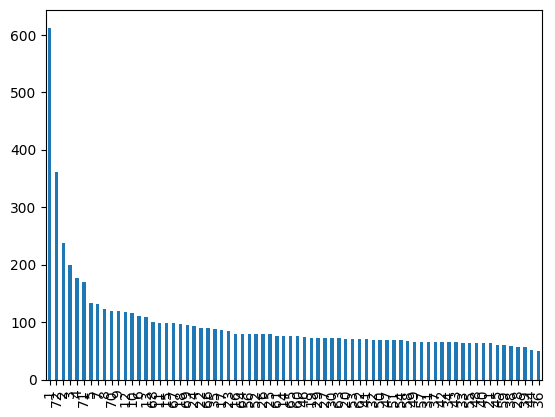

In [ ]:
telco_base_data.tenure.value_counts().plot(kind='bar')

In [ ]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_base_data['tenure_group'] = pd.cut(telco_base_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [ ]:
telco_base_data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [ ]:
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Dropping unnecessary columns

In [ ]:
telco_base_data.drop(columns=['customerID', 'tenure'], inplace=True)

telco_base_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Data Exploration - EDA

### Categorical Univariate Analysis

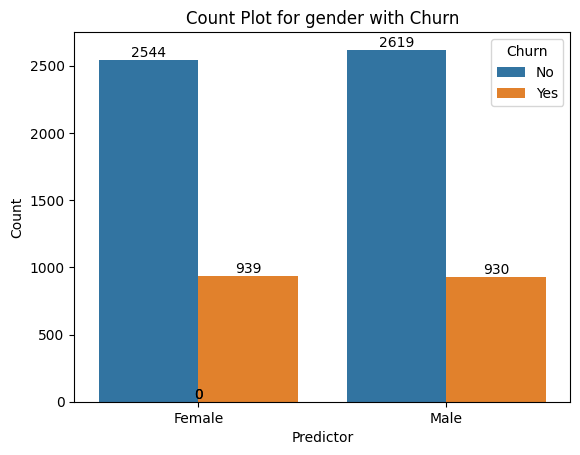

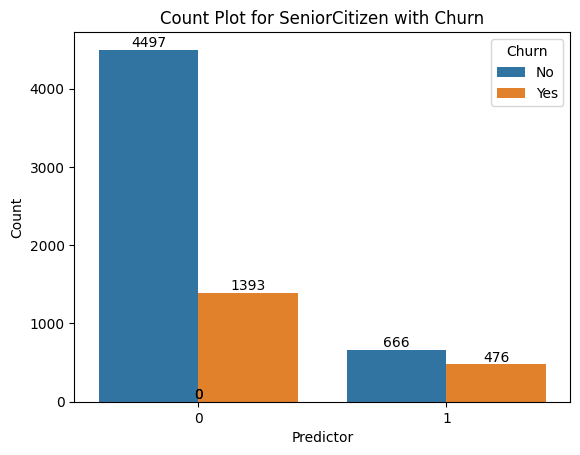

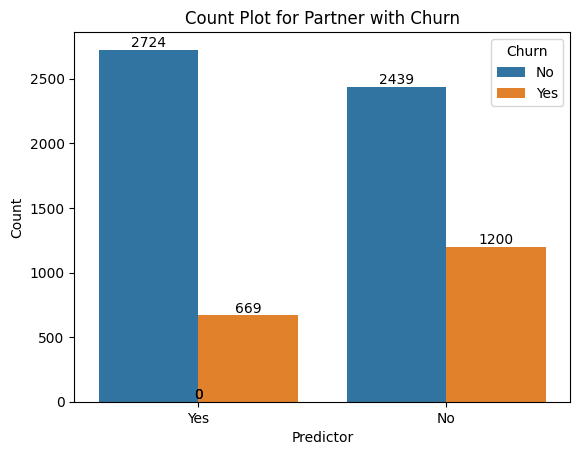

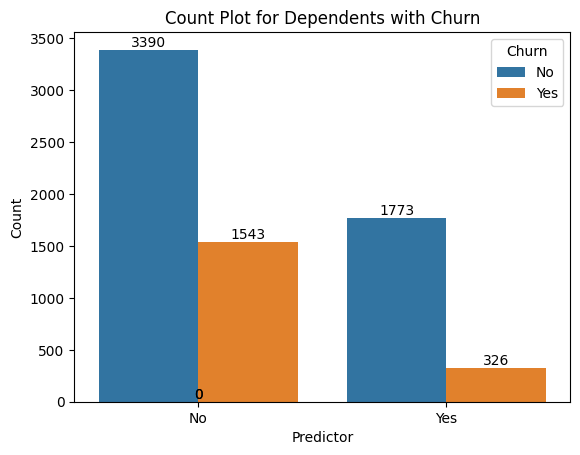

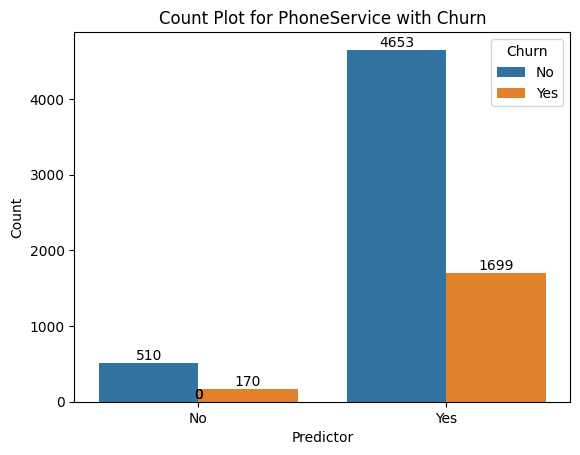

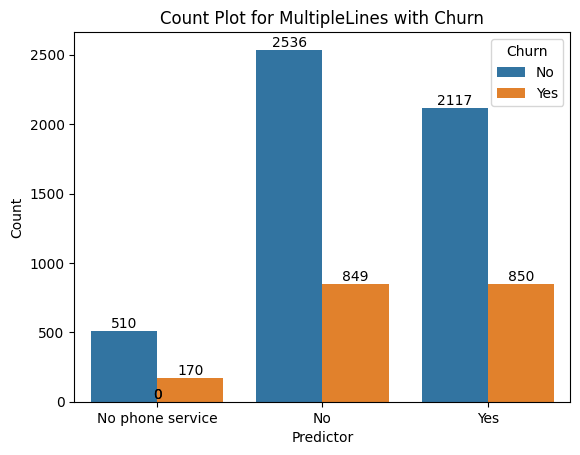

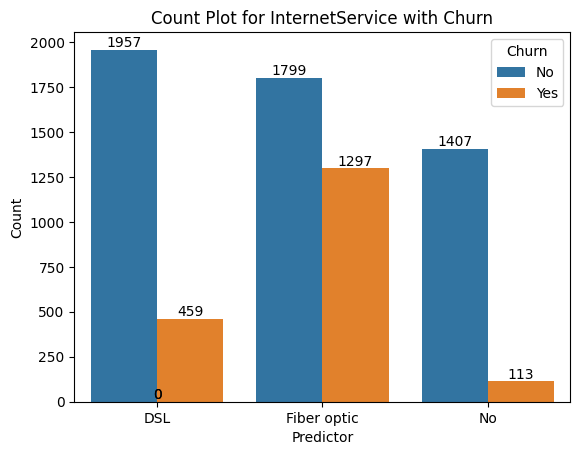

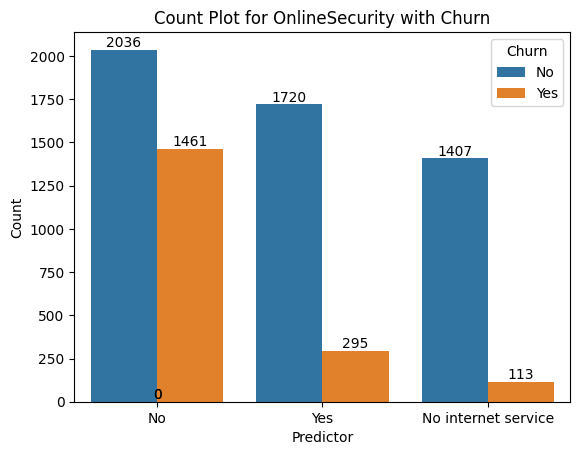

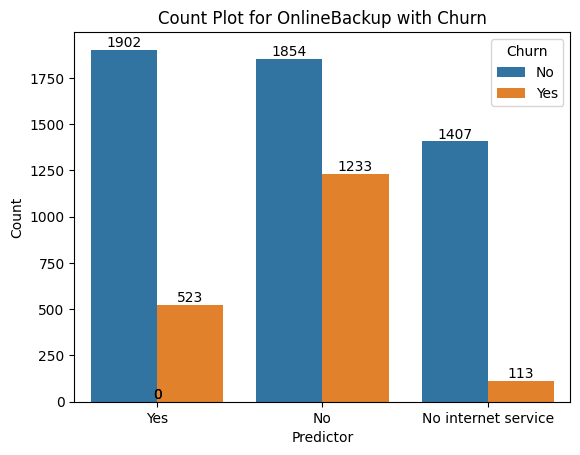

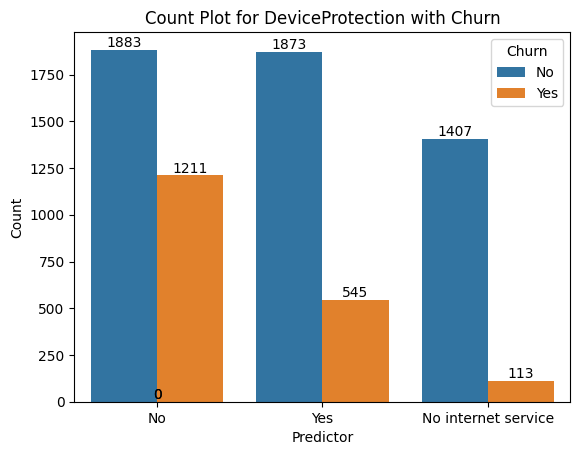

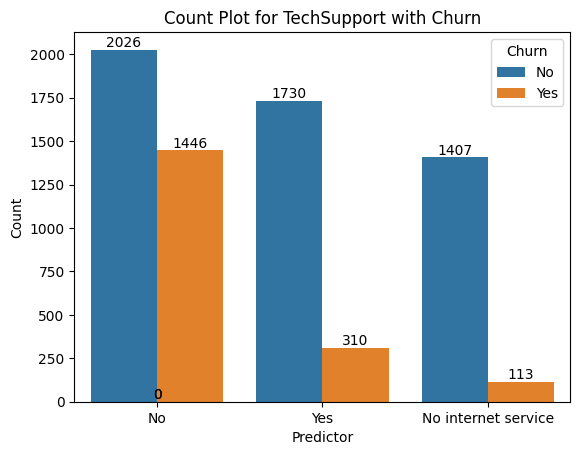

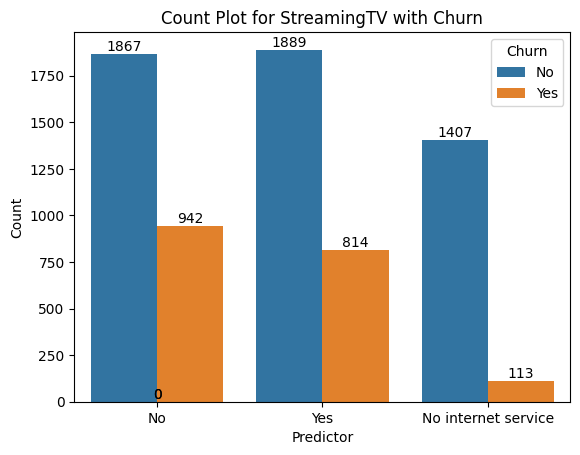

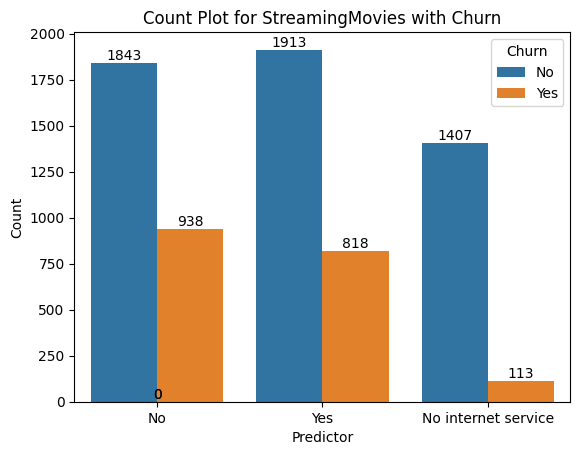

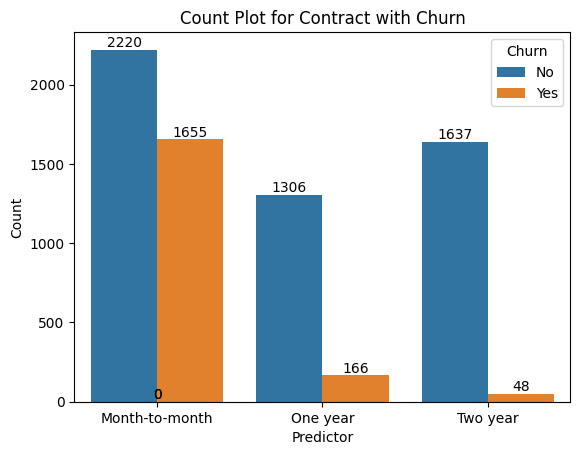

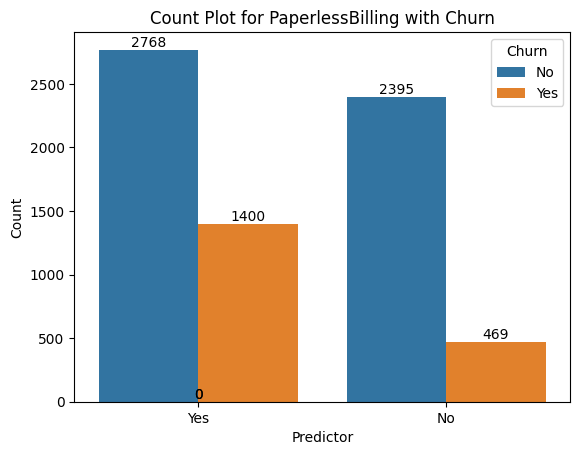

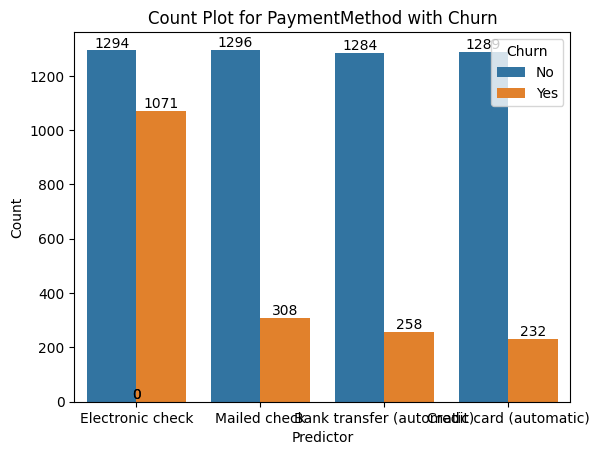

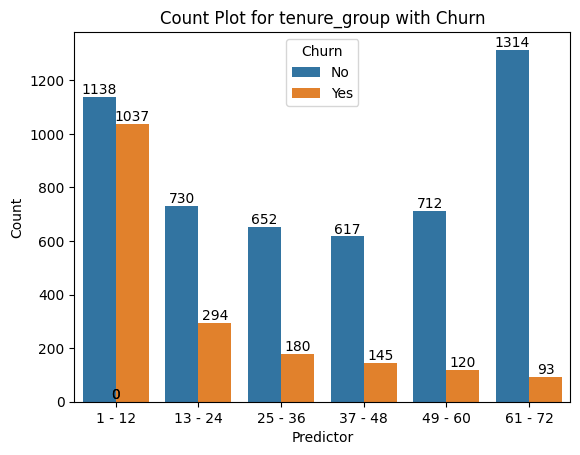

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through the predictors and create count plots with labels
for i, predictor in enumerate(telco_base_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    ax = sns.countplot(data=telco_base_data, x=predictor, hue='Churn')

    # Add labels to the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    ax.set_xlabel('Predictor')  # Set x-axis label
    ax.set_ylabel('Count')  # Set y-axis label
    ax.set_title('Count Plot for ' + predictor + ' with Churn')  # Set plot title
    plt.show()


### Numerical Univariate Analysis

<ipython-input-25-78b3a1464aa2>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  MonthlyCharges = sns.kdeplot(telco_base_data.MonthlyCharges[(telco_base_data.Churn == "No")], color='Red', shade=True)
<ipython-input-25-78b3a1464aa2>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  MonthlyCharges = sns.kdeplot(telco_base_data.MonthlyCharges[(telco_base_data.Churn == "Yes")], color='Blue', shade=True)


Text(0.5, 1.0, 'Monthly Charges by Churn')

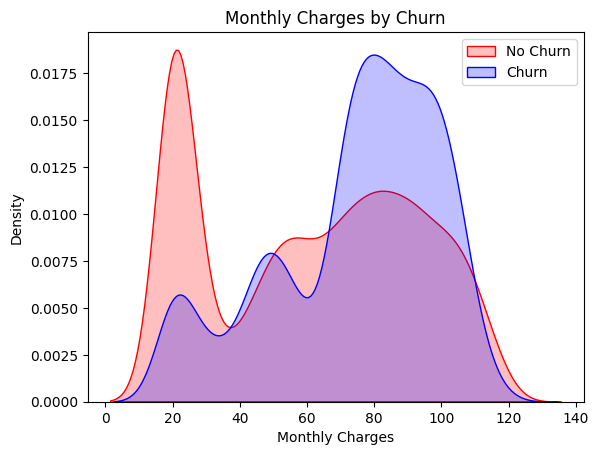

In [ ]:
MonthlyCharges = sns.kdeplot(telco_base_data.MonthlyCharges[(telco_base_data.Churn == "No")], color='Red', shade=True)
MonthlyCharges = sns.kdeplot(telco_base_data.MonthlyCharges[(telco_base_data.Churn == "Yes")], color='Blue', shade=True)
MonthlyCharges.legend(labels=['No Churn', 'Churn'], loc='upper right')
MonthlyCharges.set_ylabel('Density')
MonthlyCharges.set_xlabel('Monthly Charges')
MonthlyCharges.set_title('Monthly Charges by Churn')

<ipython-input-26-b747d4fa8016>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  TotalCharges = sns.kdeplot(telco_base_data.TotalCharges[(telco_base_data.Churn == "No")], color='Red', shade=True)
<ipython-input-26-b747d4fa8016>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  TotalCharges = sns.kdeplot(telco_base_data.TotalCharges[(telco_base_data.Churn == "Yes")], color='Blue', shade=True)


Text(0.5, 1.0, 'Total Charges by Churn')

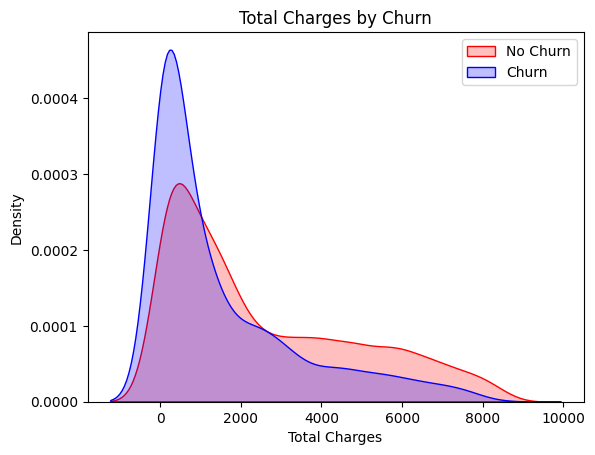

In [ ]:
TotalCharges = sns.kdeplot(telco_base_data.TotalCharges[(telco_base_data.Churn == "No")], color='Red', shade=True)
TotalCharges = sns.kdeplot(telco_base_data.TotalCharges[(telco_base_data.Churn == "Yes")], color='Blue', shade=True)
TotalCharges.legend(labels=['No Churn', 'Churn'], loc='upper right')
TotalCharges.set_ylabel('Density')
TotalCharges.set_xlabel('Total Charges')
TotalCharges.set_title('Total Charges by Churn')

In [ ]:
telco_base_data.MonthlyCharges.corr(telco_base_data.TotalCharges) #Correlation --> Peason's Correlation Coefficient --> -1, +1 -->
#~ 1 --> Positive correlation
#~ -1 --> Negative correlation
#~ 0 --> No or less correlation

0.6510648032262027

In [ ]:
telco_base_data['Churn'] = np.where(telco_base_data.Churn == "Yes", 1,0)

In [ ]:
telco_base_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


#### Categorical data to numerical data by Feature Encoding technique

In [ ]:
telco_dummies = pd.get_dummies(telco_base_data)
telco_dummies.head(5)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


#### Plotting the correlation plot of the entire data w.r.t Churn

<Axes: >

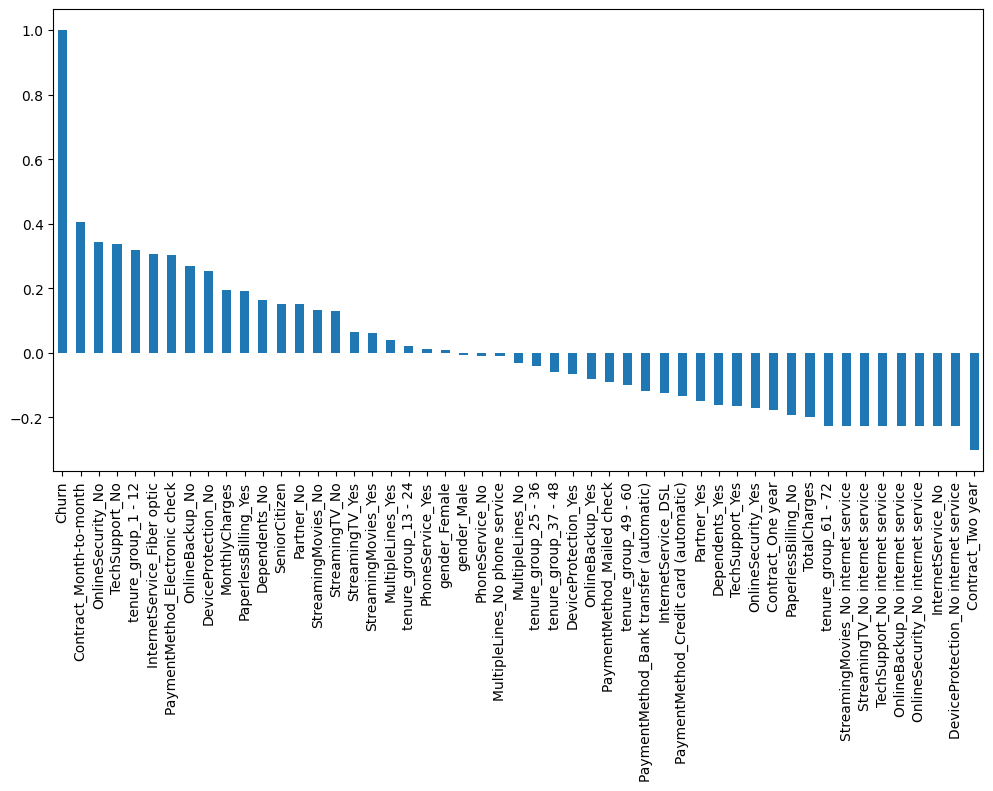

In [ ]:
plt.figure(figsize=(12,6))
telco_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

## Bivariate Analysis

In [ ]:
new_df1_target0=telco_base_data.loc[telco_base_data["Churn"]==0]
new_df1_target1=telco_base_data.loc[telco_base_data["Churn"]==1]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def uniplot(df, col, title, hue=None):
    plt.figure(figsize=(10, 6))  # Set the size of the graph
    plt.title(title)
    ax = sns.countplot(data=df, x=col, hue=hue, palette='bright')

    # Adding data labels to each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points')

    # Adjust the size of the legend
    if hue:
        ax.legend(fontsize='small')  # You can adjust the fontsize as needed

    plt.show()



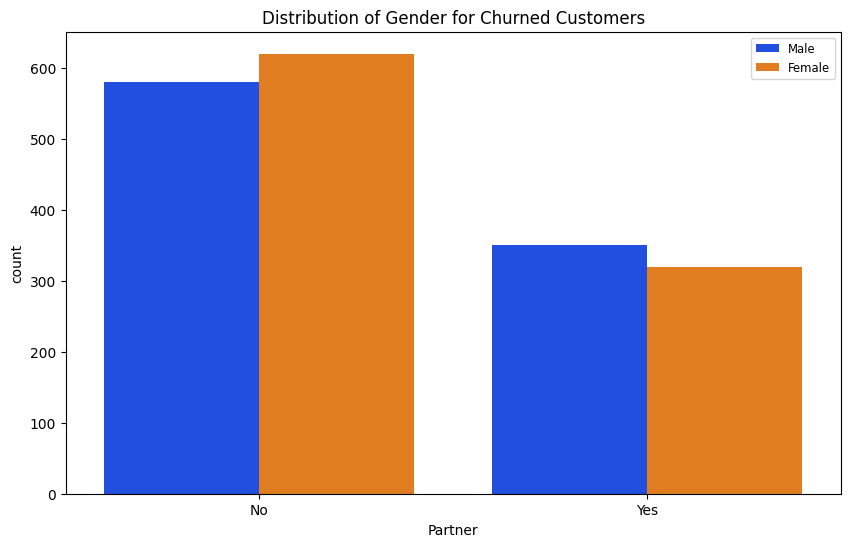

In [ ]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

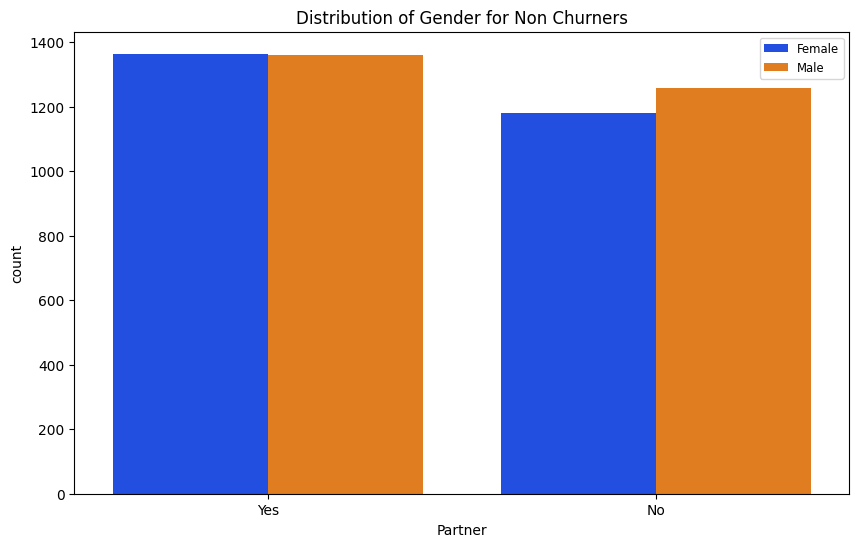

In [ ]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churners',hue='gender')

#Bivariate Analysis :

**Gender and churn vs Other columns:**

1. Storing the columns in a variable to create a for loop to generate bar graphs


In [ ]:
new_df1_target0.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

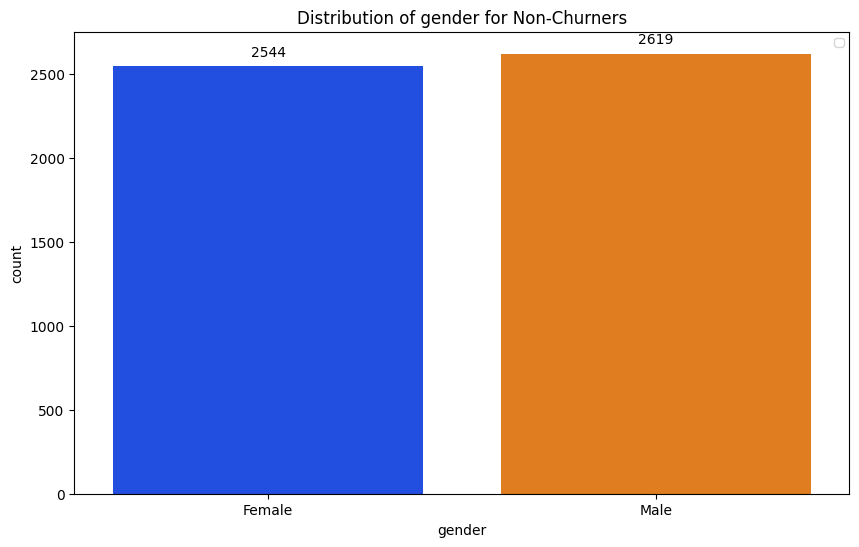

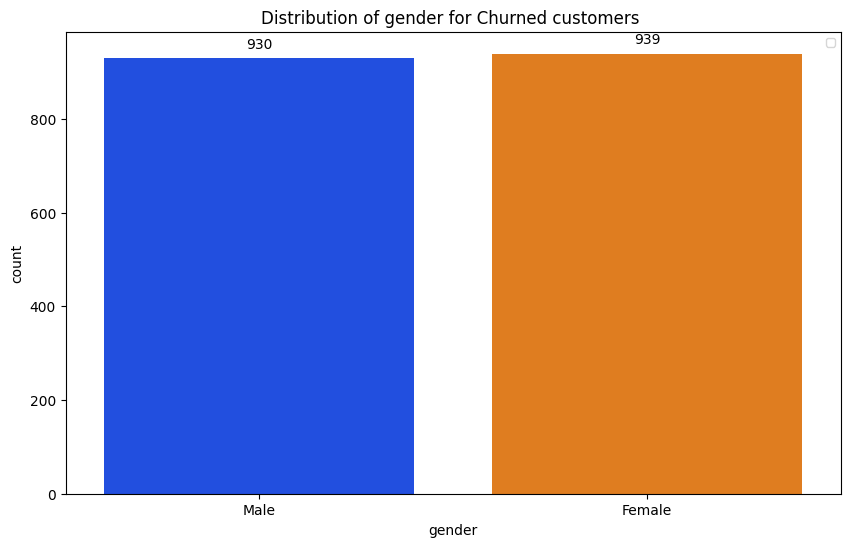

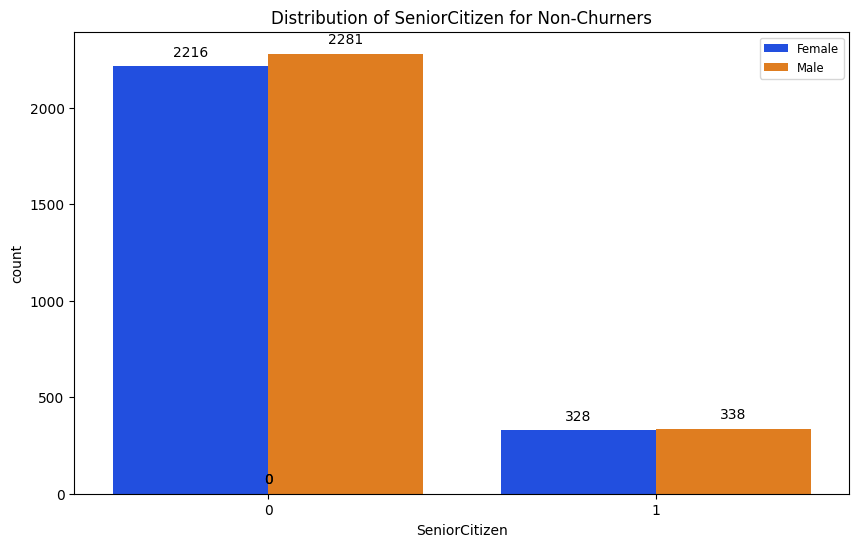

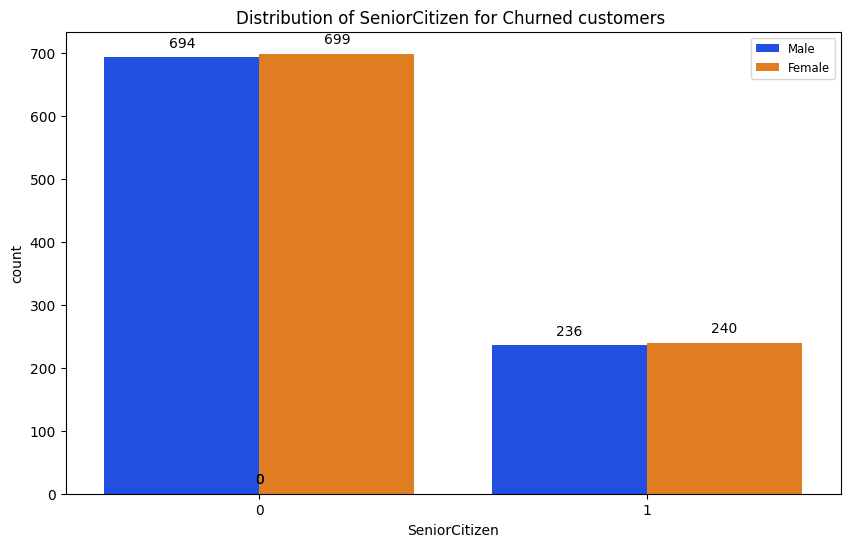

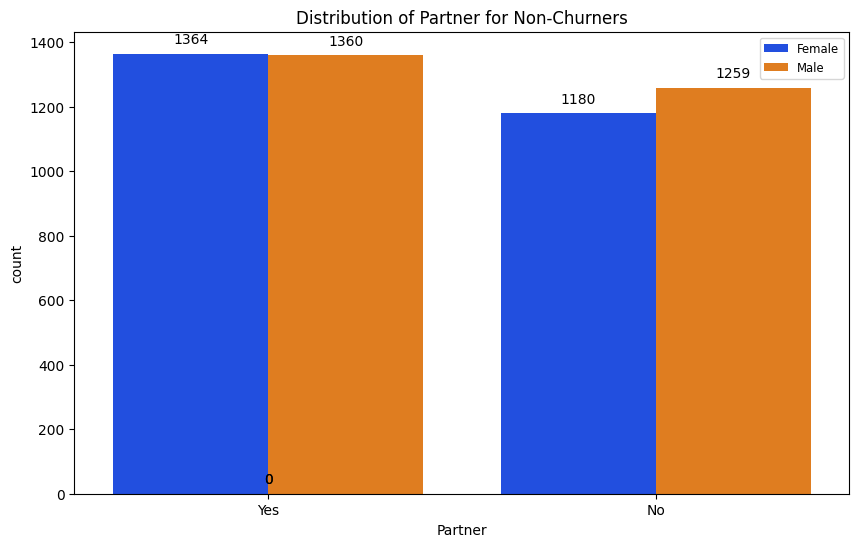

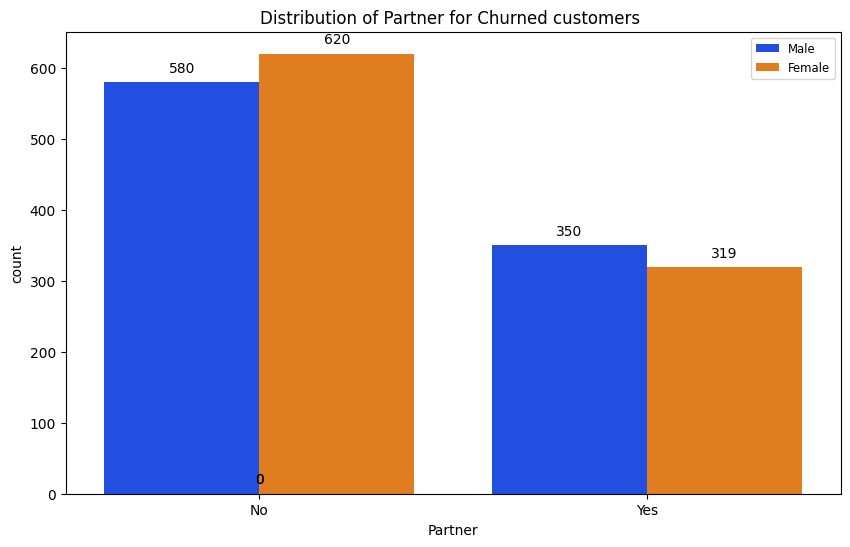

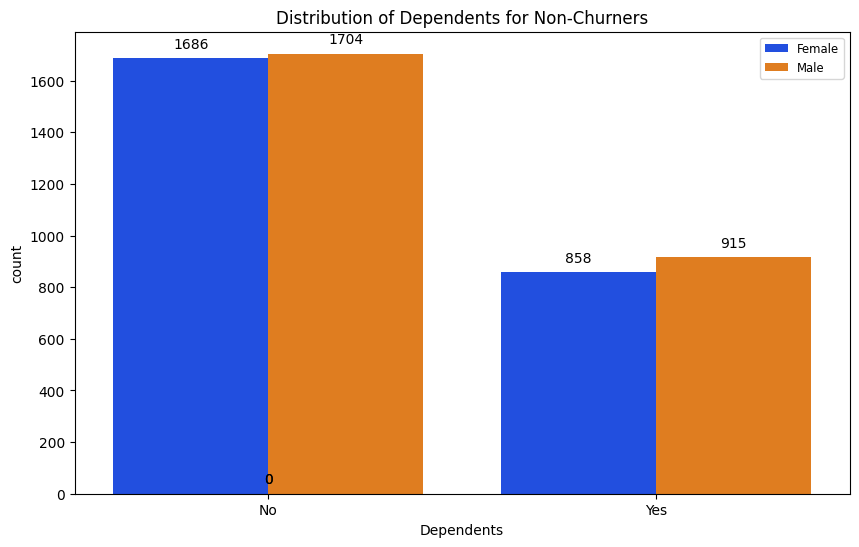

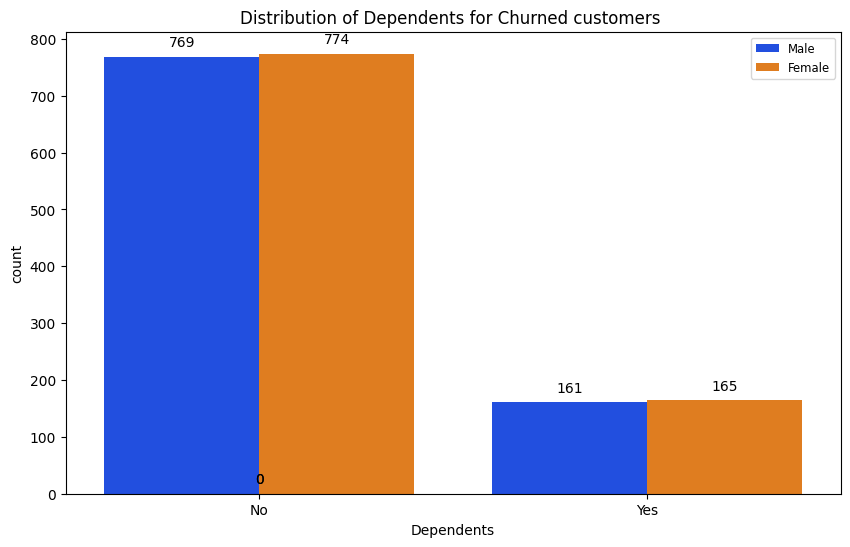

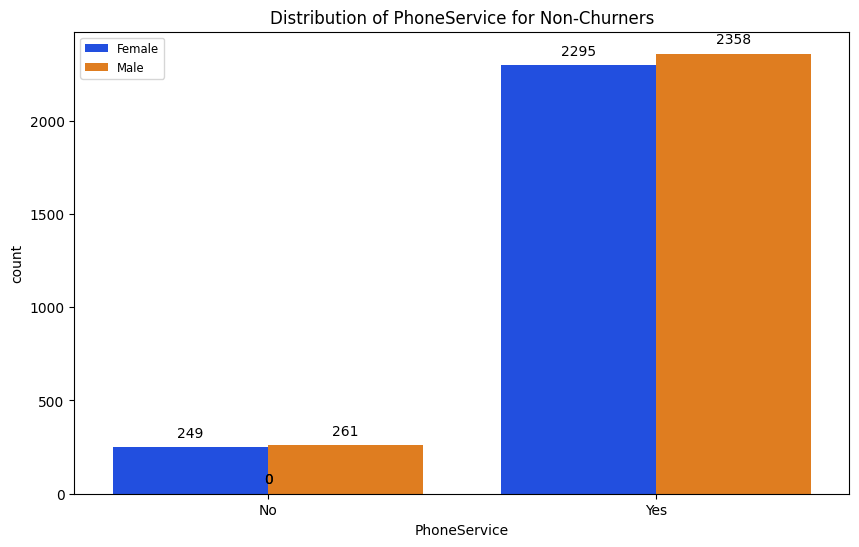

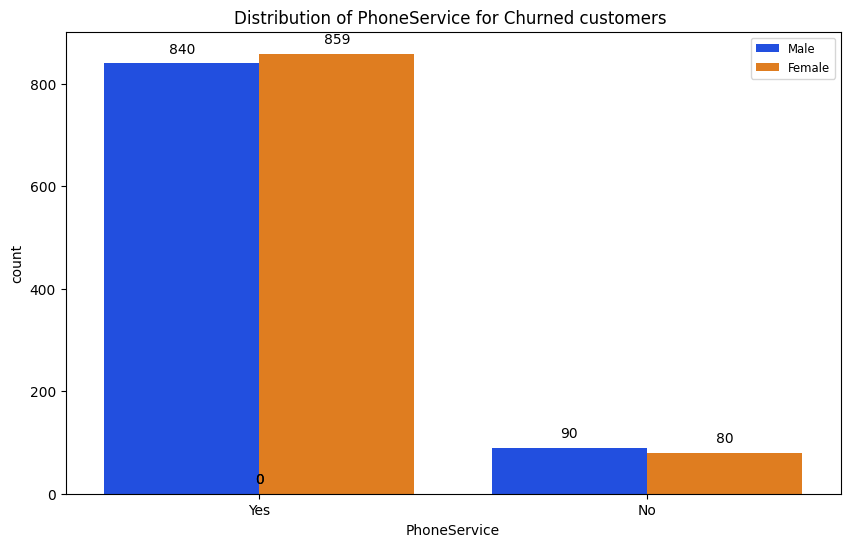

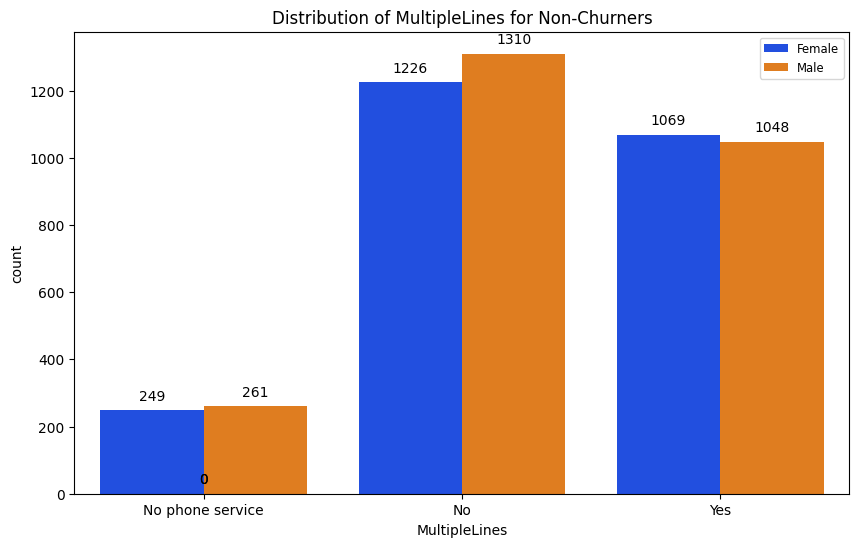

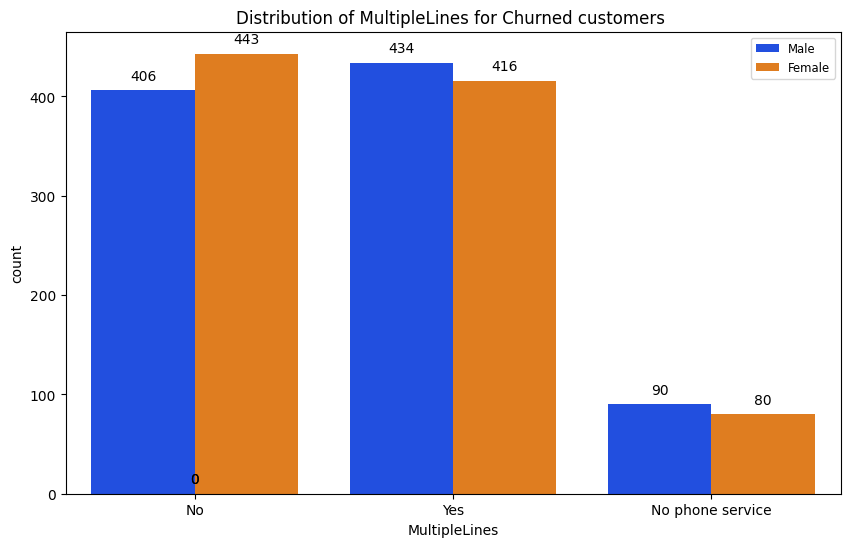

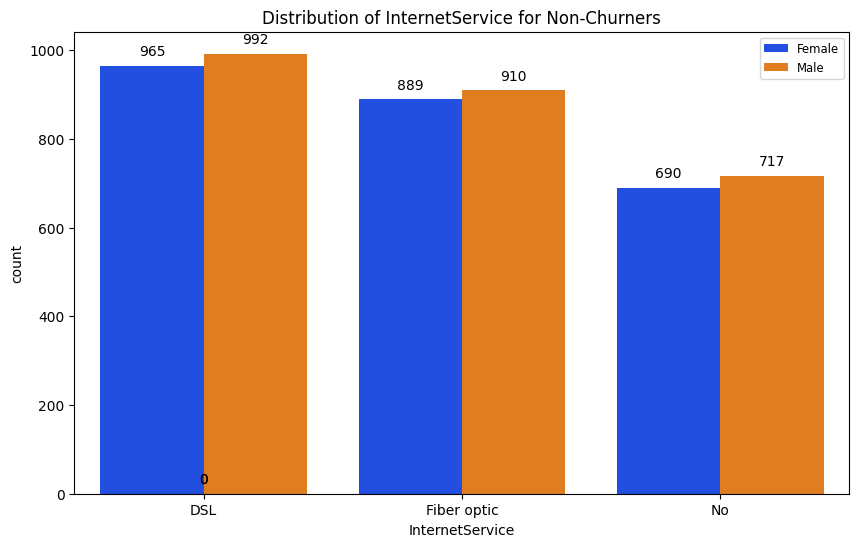

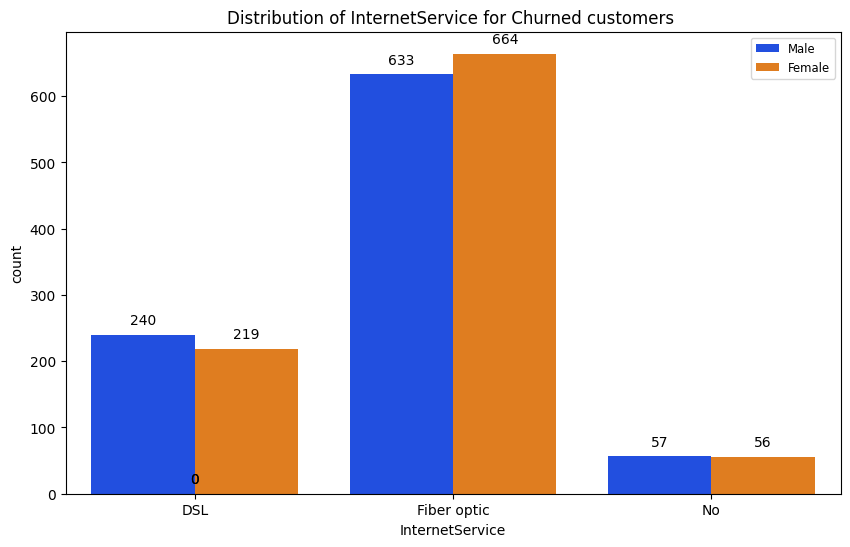

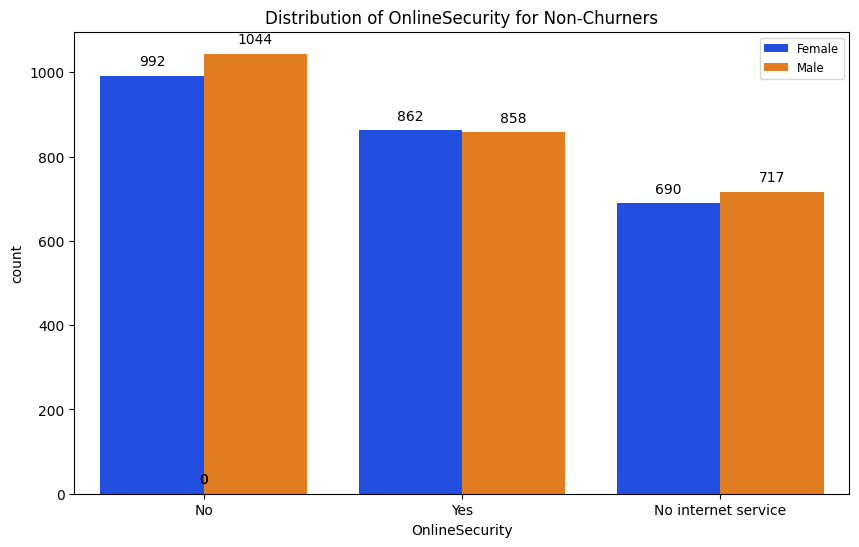

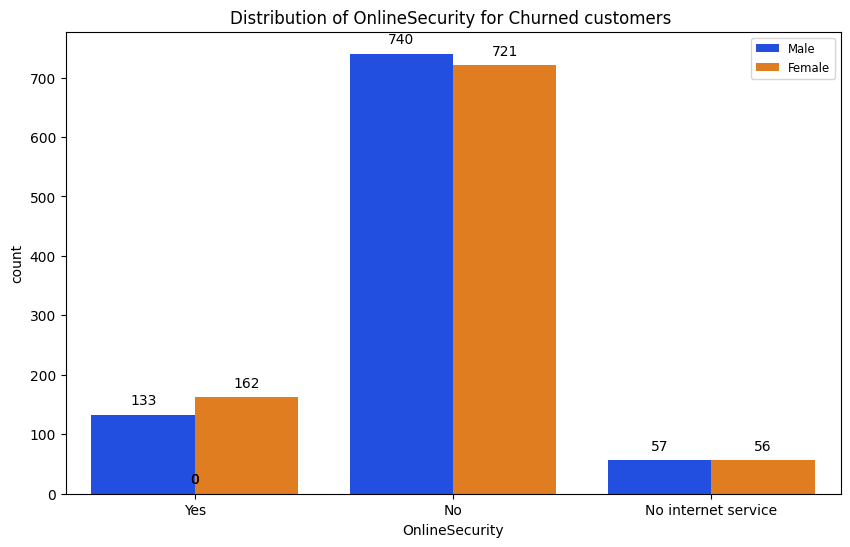

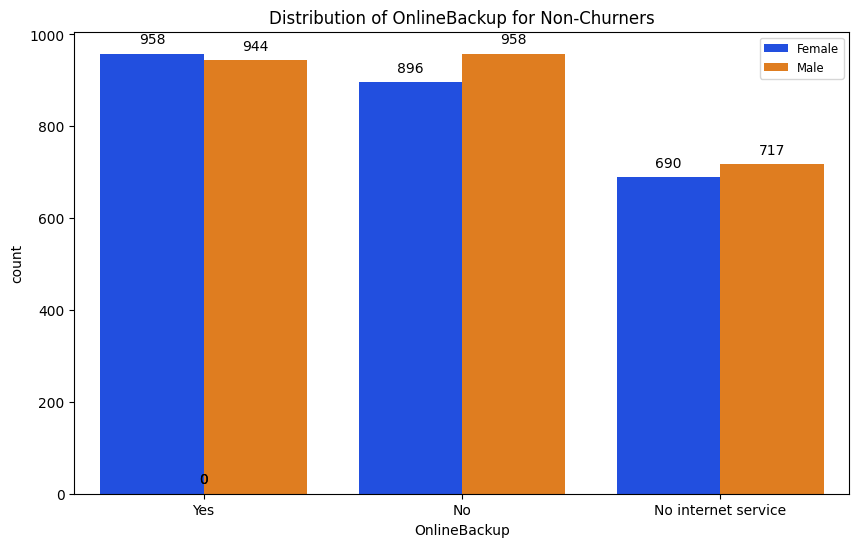

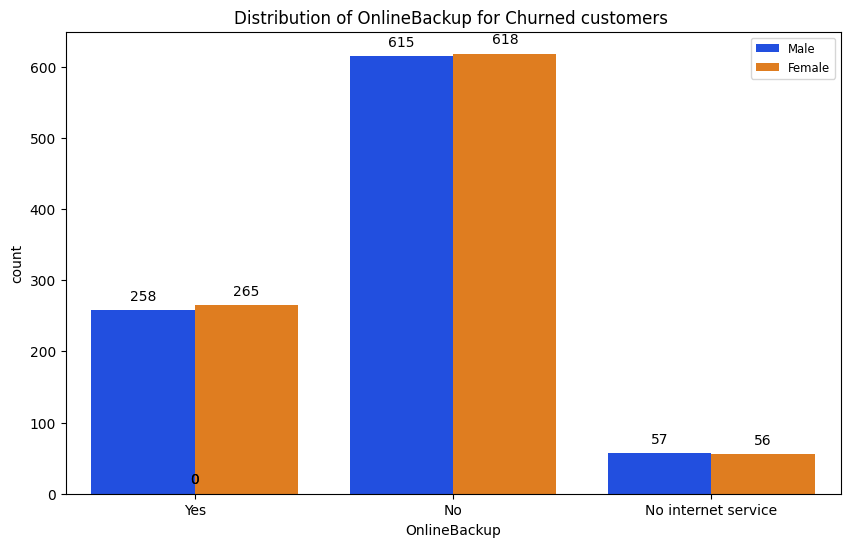

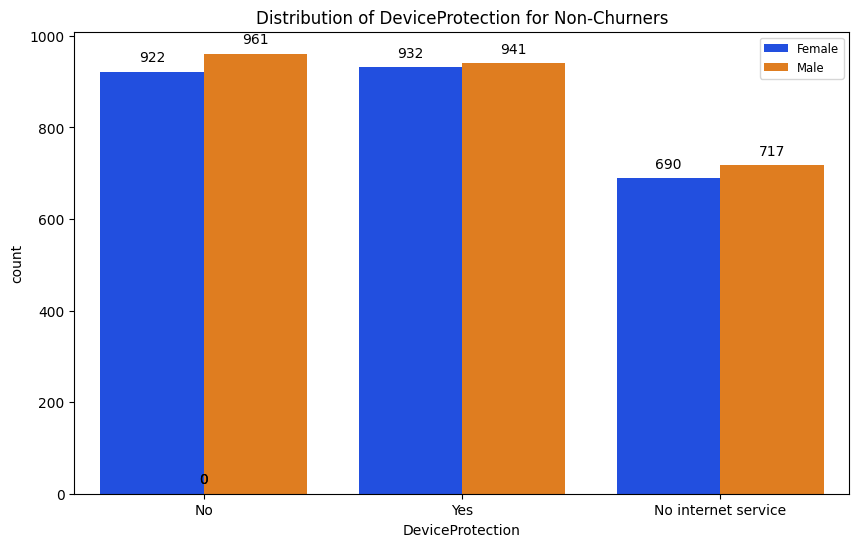

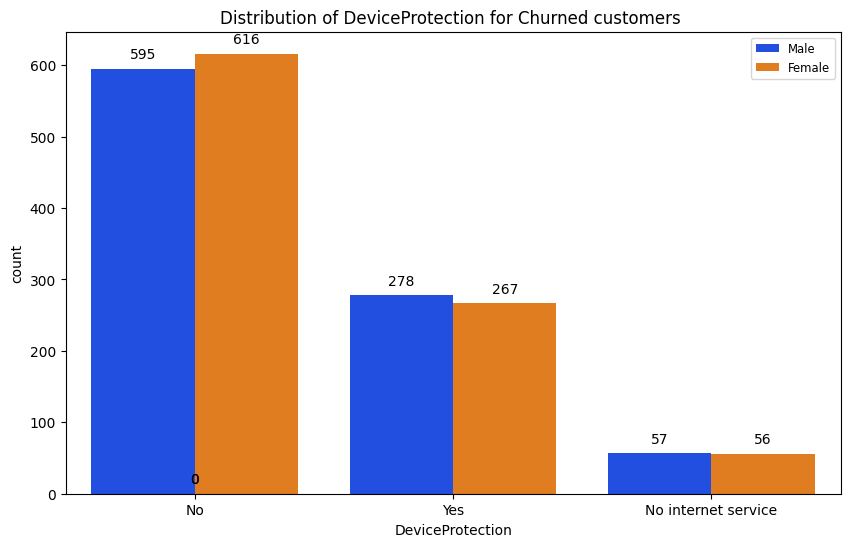

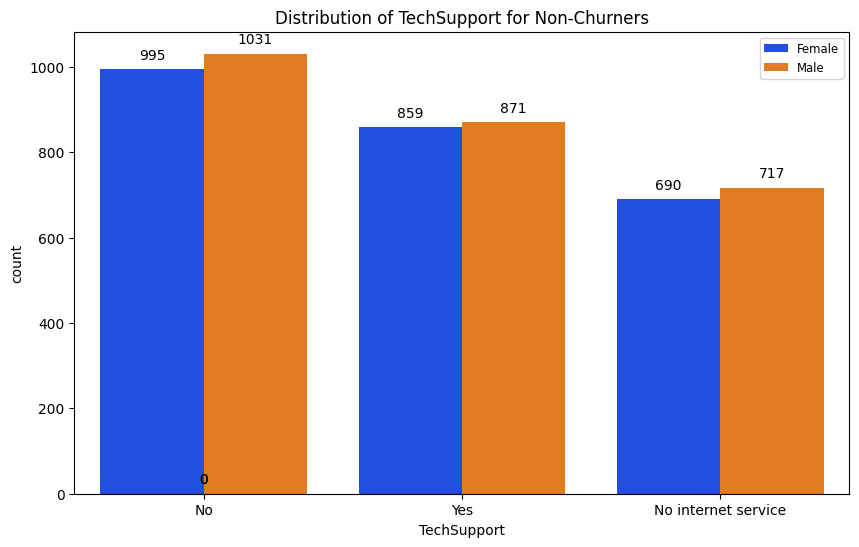

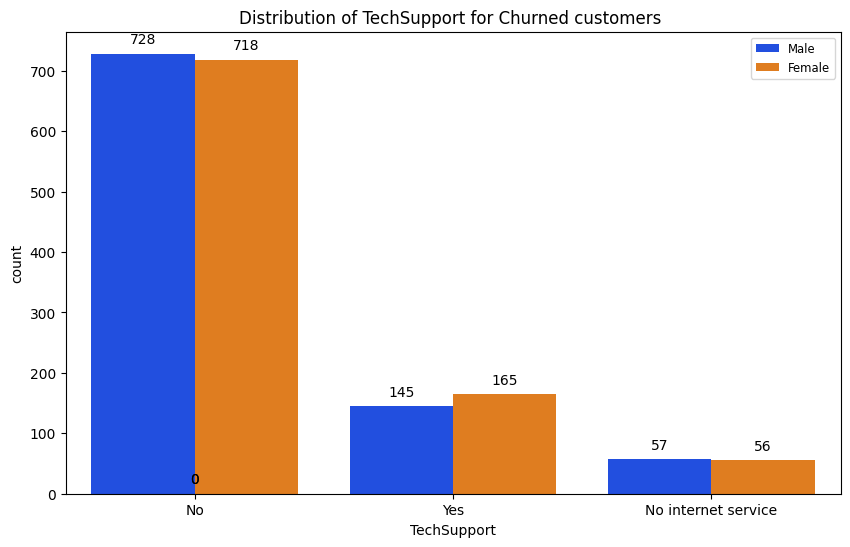

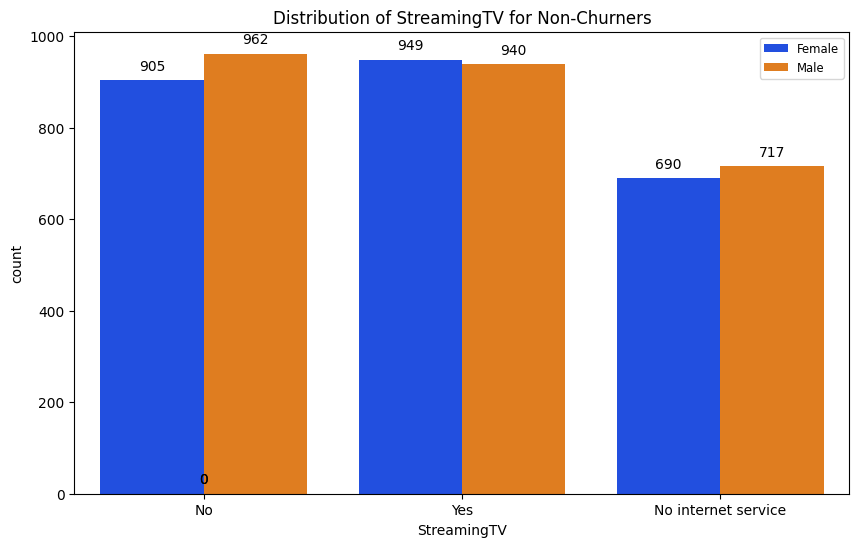

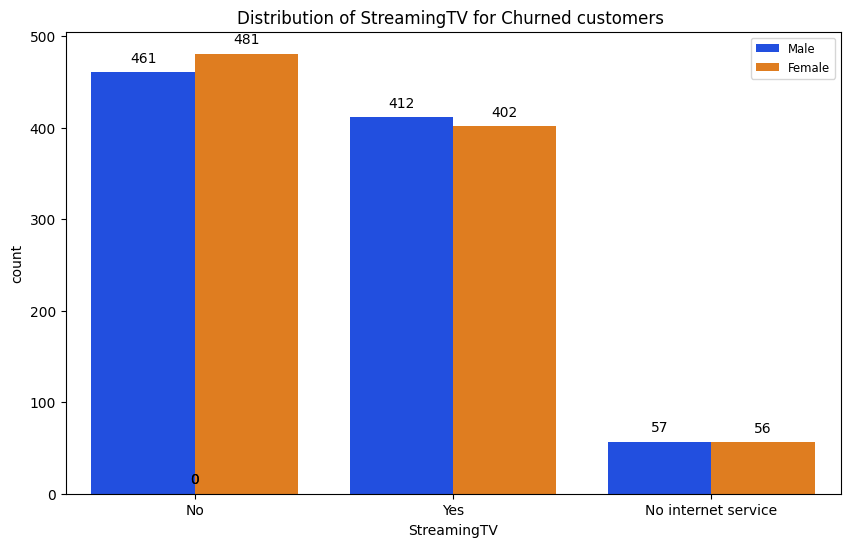

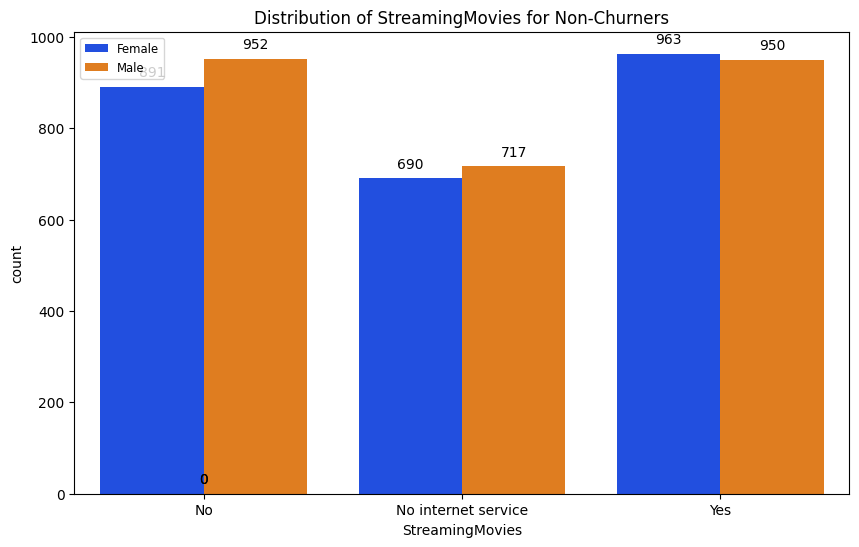

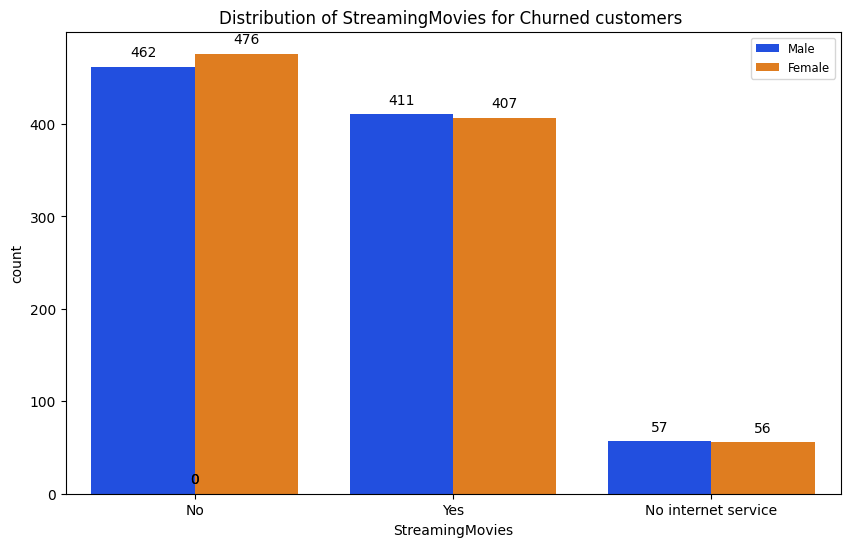

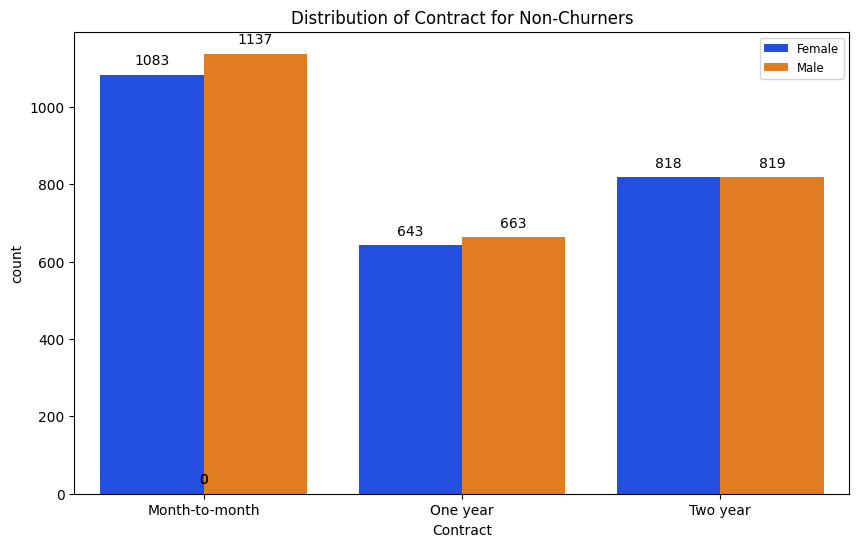

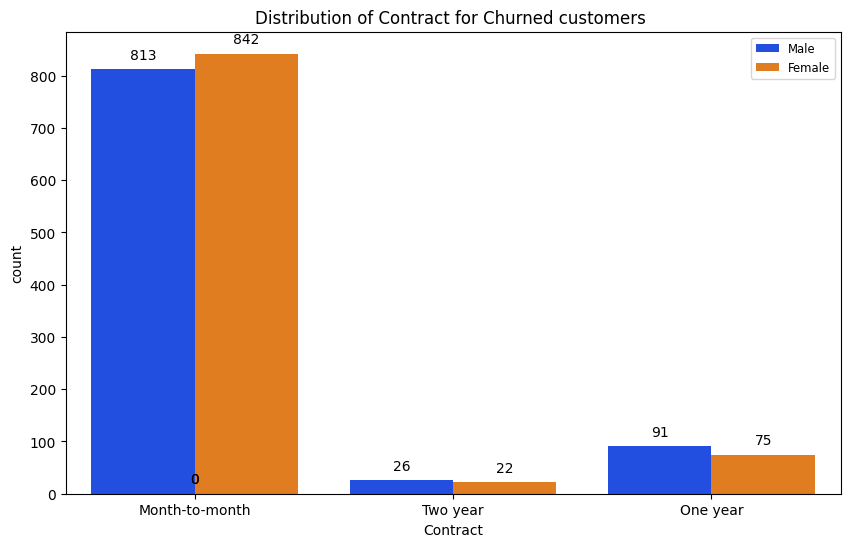

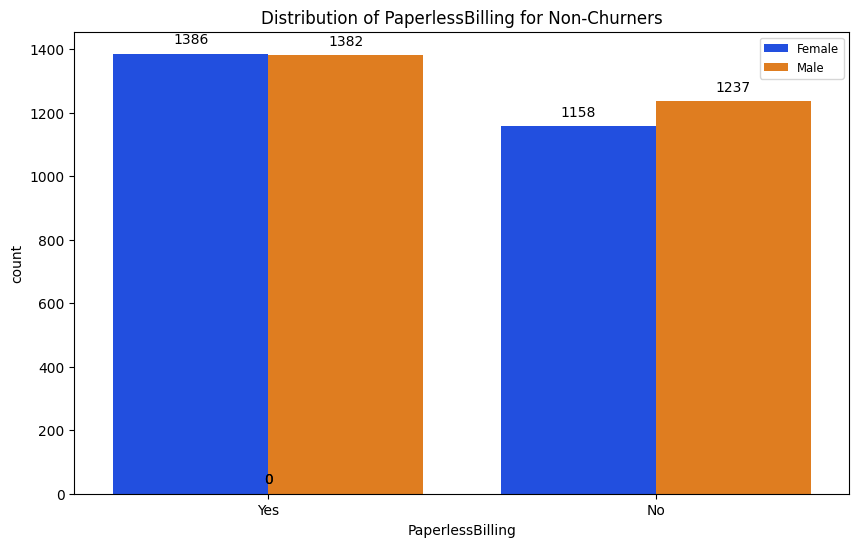

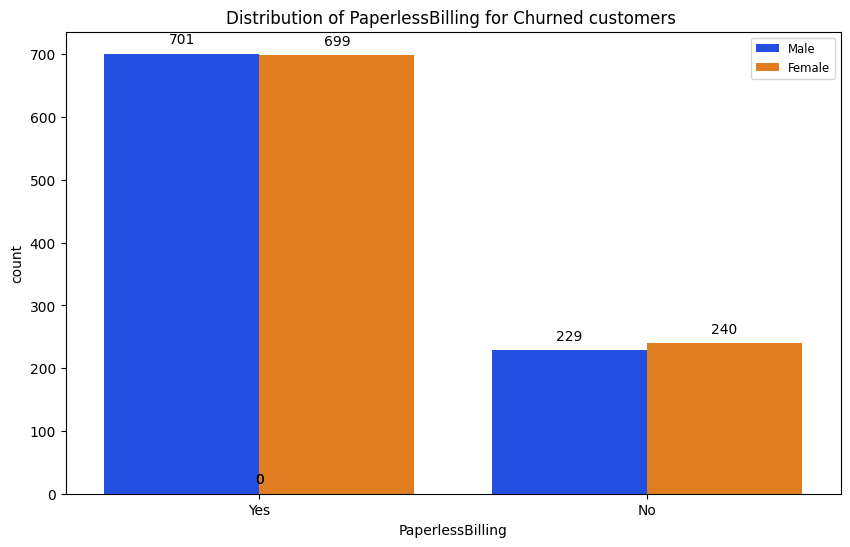

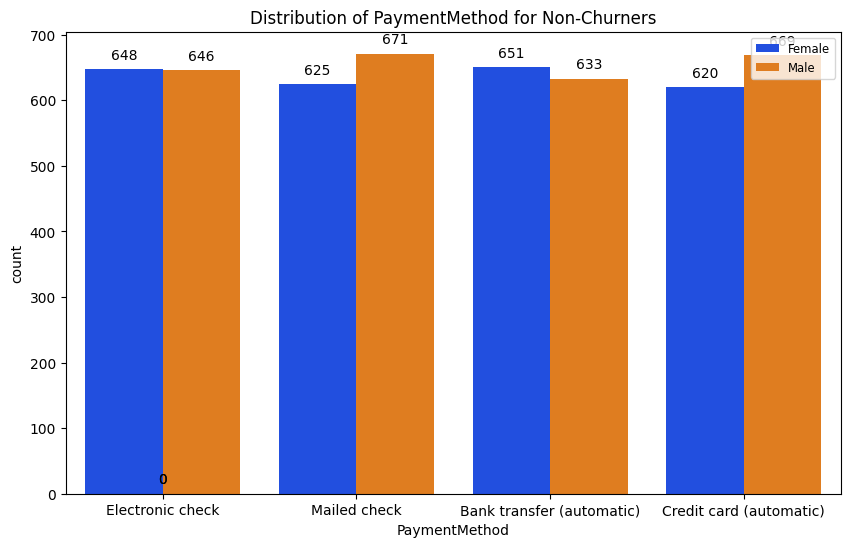

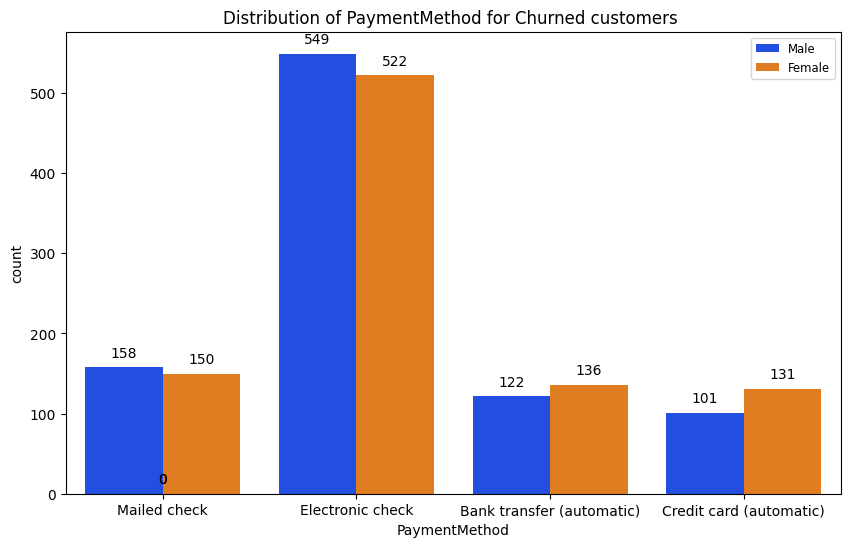

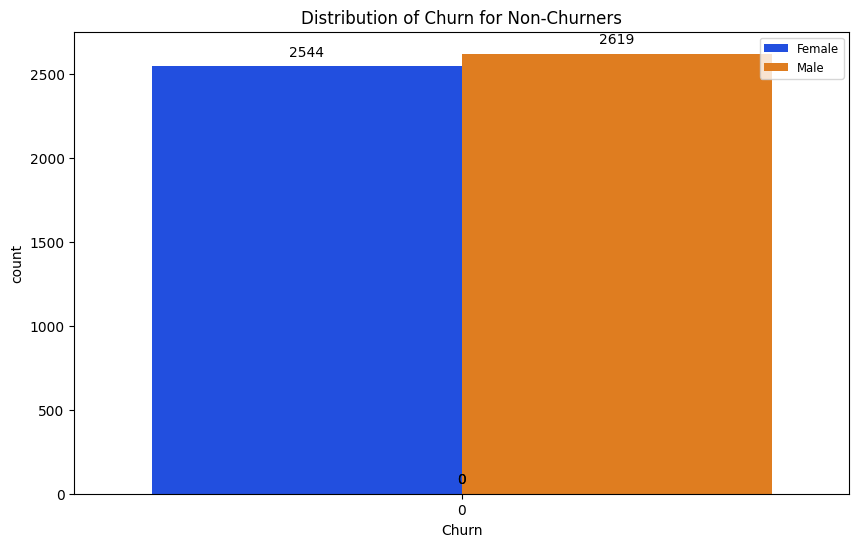

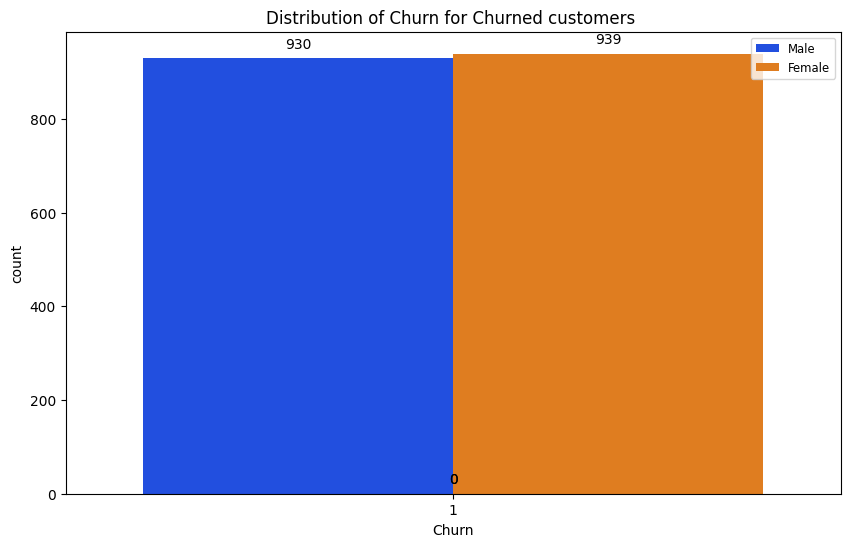

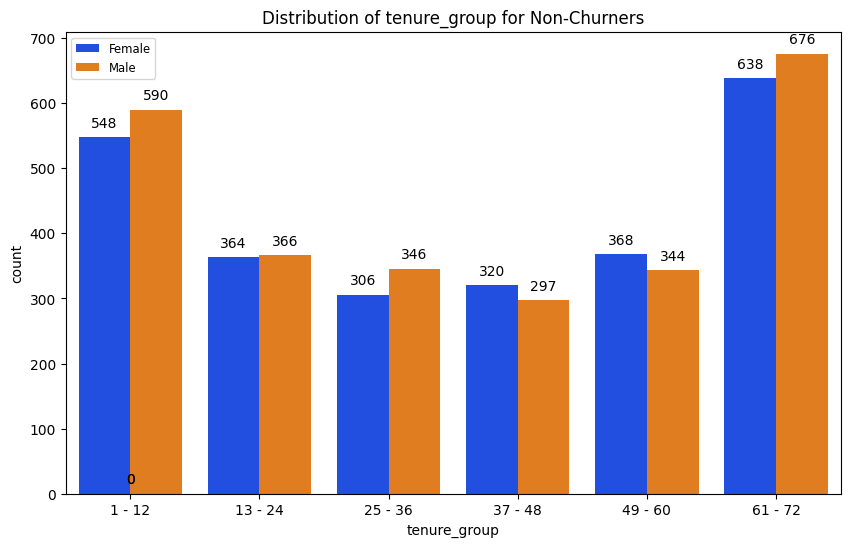

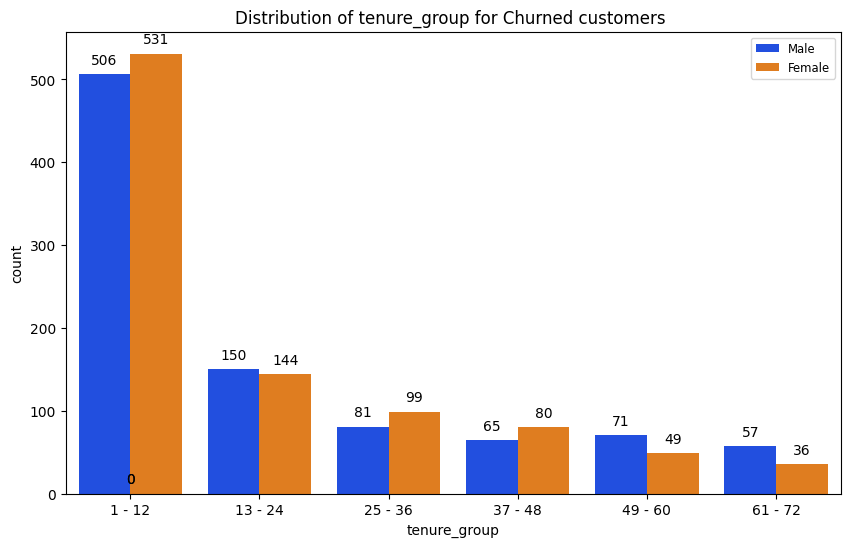

In [ ]:
columns_to_plot = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                   'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                   'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'tenure_group']

for column in columns_to_plot:
    uniplot(new_df1_target0, col=column, title=f'Distribution of {column} for Non-Churners', hue='gender')
    uniplot(new_df1_target1, col=column, title=f'Distribution of {column} for Churned customers ', hue='gender')

#Churn percentages and insights:

Comparing the different values columns vs Gender and Churn :

1. 'SeniorCitizen'

        Senior vs. Non-Senior:

        Male churn % = 236/(236+338) =   41.11
        Female senior churn % = 42.25

        Male non-senior churn % = 23.33
        Female non-senior churn % = 23.98

   * Both male and female senior citizens exhibit significantly higher churn rates compared to non-senior citizens.
   * Female senior citizens have a slightly higher churn rate than male senior citizens.


2. 'Partner'

        With or without partner

        Male with partner churn % = 20.45
        Female with partner churn % = 18.98

        Male without partner churn % = 31.58
        Female without partner churn % = 34.43

      * Customers without partners tend to have higher churn rates regardless of gender.
      * Females without partners have the highest churn rate among all categories.

3. 'Dependents'

        With or withour dependents:

        Male with dependents churn % = 14.97
        Female with dependents churn % = 16.12

        Male without dependents churn % = 31.1
        Female without dependents churn % = 31.46

    * Customers without dependents generally have higher churn rates.
    * The difference in churn rates between males and females with and without dependents is not significant.


4. 'PhoneService'

        With or without service:

        Male with phone service churn % = 26.27
        Female with phone service churn % = 27.26

        Male without phone service churn % = 25.64
        Female without phone service churn % = 24.32


   * The presence or absence of phone service does not significantly affect churn rates across genders


5.  'MultipleLines'

        With or without Mutiple lines:

        Male with multiple lines churn % = 29.29
        Female with multiple lines churn % = 28.01

        Male without multiple lines churn % = 23.66
        Female without multiple lines churn % = 26.56

    * Having multiple lines doesn't significantly impact churn rates among both genders.

6. 'InternetService'

        With Fibre optics:

        Male with fibre optics churn % = 41.07
        Female with fibre optics churn % = 42.79

        With DSL:
        Male with DSL lines churn % = 19.48
        Female with DSL churn % = 18.48

    * Customers with fiber optics internet service tend to have higher churn rates compared to DSL.
    * Male customers with fiber optics have a higher churn rate than females with fiber optics.


7.  'OnlineSecurity'


        With or withour Online Security:

        Male with online security churn % = 13.44
        Female with online security churn % = 15.82

        Male without online security churn % = 41.48
        Female without online security churn % = 42.09

8. 'OnlineBackup'

        With or without online backyp:

        Male with online backup churn % = 21.47
        Female with online backup churn % = 21.64

        Male without online backup churn % = 39.06
        Female without online backup churn % = 40.48

9. 'DeviceProtection'

        With or without Device protection plan:

        Male with device protection churn % = 38.73
        Female with device protection churn % = 39.83

        Male without device protection churn % = 22.42
        Female without device protection churn % = 22.47


10. 'TechSupport'

        With or Without Tech support:

        Male with tech support churn % = 14.27
        Female with tech support churn % = 16.09

        Male without tech support churn % = 41.41
        Female without tech support churn % = 41.91

**OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport:**


Customers without these services tend to have higher churn rates, indicating the importance of these services in customer retention.




11. 'StreamingTV'


        With or without Streaming TV Service:

        Male with Streaming TV churn % = 30.51
        Female with Streaming TV churn % = 29.79

        Male without Streaming TV churn % = 32.39
        Female without Streaming TV churn % = 34.70


12. 'StreamingMovies'

        With or without Streaming movie Service:

        Male with Streaming movies service churn % = 30.19
        Female with Streaming movies service churn % = 29.72

        Male without Streaming movies service churn % = 32.67
        Female without Streaming movies service churn % = 34.82


**StreamingTV, StreamingMovies:**

The presence or absence of streaming services does not significantly affect churn rates among both genders.


13. 'Contract'

        With Month-to-month contract type:

        Male with month-to-month contract churn % = 41.61
        Female with month-to-month contract churn % = 43.73

        With one-year contract type:

        Male with one-year contract service churn % = 12.07
        Female with one-year contract churn % = 10.44

        With two-year contract type:

        Male with two-year contract churn % = 3.08
        Female with two-year contract churn % = 2.62


  * Month-to-month contracts have significantly higher churn rates compared to one-year and two-year contracts for both genders.
  * Females tend to have slightly higher churn rates across all contract types.


14. 'PaperlessBilling'

        With or without paperless billing:

        Male with paperless billing churn % = 33.64
        Female with paperless billing churn % = 33.51

        Male without paperless billing churn % = 15.62
        Female without paperless billing churn % = 17.17

    Customers with paperless billing tend to have higher churn rates compared to those without paperless billing.

15. 'PaymentMethod'

        With electronic check payment method:

        Male with electronic check payment method churn % = 45.94
        Female with electronic check payment method churn % = 44.62

        With mailed check payment method:

        Male with mailed check payment method churn % = 19.08
        Female with mailed check payment method churn % = 19.35

        With bank transfer payment method :

        Male with bank transfer payment method churn % = 16.19
        Female with bank transfer payment method churn % = 17.03

        With credit transfer payment method :

        Male with credit transfer payment method churn % = 13.12
        Female with credit transfer payment method churn % = 17.44


  * Customers using electronic check payment methods have the highest churn rates, indicating potential issues with this payment method.
  * Mailed check and bank transfer payment methods have relatively lower churn rates.



16. 'tenure_group'


        In 1-12 tenure months group:

        Male with 1-12 tenure group churn % = 46.18
        Female with 1-12 tenure group churn % = 49.18

        In 13-24 tenure months group:

        Male with 13-24 tenure group churn % = 29.09
        Female with 13-24 tenure group churn % = 28.32

        In 25-36 tenure months group:

        Male with 25-36 tenure group churn % = 18.99
        Female with 25-36 tenure group churn % = 24.43

        In 37-48 tenure months group:

        Male with 37-48 tenure group churn % = 17.94
        Female with 37-48 tenure group churn % = 20.00

        In 49-60 tenure months group

        Male with 49-60 tenure group churn % = 17.11
        Female with 49-60 tenure group churn % = 11.75

        In 61-72 tenure months group:

        Male with 61-72 tenure group churn % = 7.78
        Female with 61-72 tenure group churn % = 5.34


  * New customers (1-12 tenure months group) have higher churn rates compared to customers with longer tenure.
  * Female customers generally exhibit higher churn rates across all tenure groups, indicating a need for improved retention strategies, especially for new female customers



#Conclusion:

1. Customers without partners or dependents exhibit higher churn rates, suggesting the importance of family-oriented plans and services.
Service Provision:

2. Certain services such as online security, online backup, device protection, and tech support play crucial roles in customer retention.
Fiber optics internet service subscribers, particularly males, demonstrate higher churn rates compared to DSL users.


3. Month-to-month contracts significantly contribute to higher churn rates, highlighting the need for incentivizing longer-term contracts.

4. Customers with paperless billing and those using electronic check payment methods show elevated churn rates, signaling potential issues with billing practices and payment methods.

5. New customers within the first year of subscription exhibit higher churn rates compared to those with longer tenure, emphasizing the importance of early engagement and retention efforts.

6. Female customers consistently display higher churn rates across various tenure groups